## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [2]:
import pandas as pd 
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', index_col='Date', parse_dates=True)

In [3]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


For convenience, we'll further process this dataset by shortening the column names:

In [4]:
data.columns = ['Total', 'East','West']


Now let's take a look at the summary statistics for this data:

In [5]:
data.dropna().describe()

,Total,East,West
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas.util.testing as tm

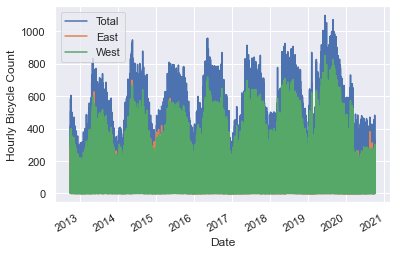

In [9]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by month:

Text(0, 0.5, 'Monthly bicycle count')

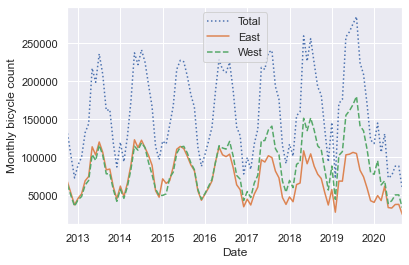

In [10]:
weekly = data.resample('M').sum()
weekly.plot(style=[':','-','--'])
plt.ylabel('Monthly bicycle count')

In [ ]:
#En las variables temporales y clíclica, tiene más complejidad por: la parte ciclica, tendencia y las aleatorias.
#Si se puede alterar el resgistro descartando el momento temploral y no le afecta... No es una seria Temporal.

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

Text(0, 0.5, 'mean hourly count')

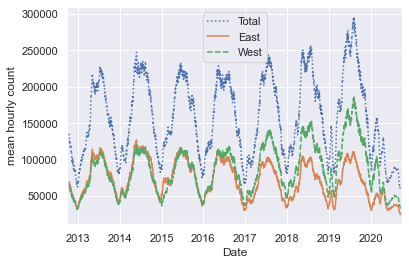

In [11]:
daily = data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','-','--'])
plt.ylabel('mean hourly count')

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

<AxesSubplot:xlabel='Date'>

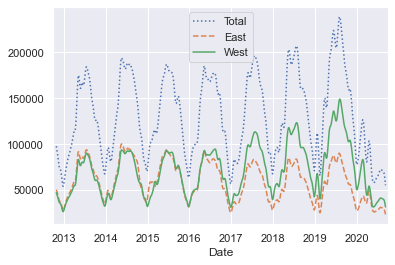

In [12]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [14]:
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [13]:
data.groupby(data.index.time).mean() 
#Agrupamos por hora y calculamos la agregación (media) calculada entre todos los días

,Total,East,West
00:00:00,11.272839,4.777328,6.495511
01:00:00,5.967259,2.674705,3.292554
02:00:00,3.927488,1.884439,2.043049
03:00:00,2.897729,1.490055,1.407675
04:00:00,6.475092,3.435135,3.039958
05:00:00,25.551487,15.578067,9.973420
06:00:00,89.696532,53.864108,35.832424
07:00:00,226.302236,140.275128,86.027108
08:00:00,321.041190,188.888928,132.152262
09:00:00,188.089628,101.879204,86.210424


In [16]:
data.groupby([data.index.time,data.index.month]).mean() 

Total       East       West
         Date                                 
00:00:00 1      7.100806   3.149194   3.951613
         2      7.154867   3.013274   4.141593
         3      7.997959   3.481633   4.516327
         4      9.337500   4.229167   5.108333
         5     13.350538   5.810753   7.539785
...                  ...        ...        ...
23:00:00 8     29.178495  11.359140  17.819355
         9     22.980000   9.180000  13.800000
         10    19.451220   8.138211  11.313008
         11    14.800000   5.987500   8.812500
         12    11.157258   4.633065   6.524194

[288 rows x 3 columns]

<AxesSubplot:xlabel='time'>

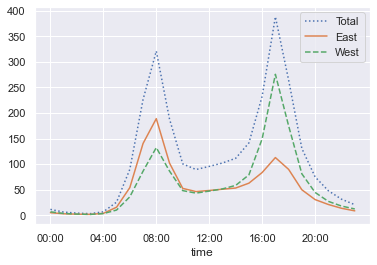

In [20]:
import numpy as np 
by_time = data.groupby(data.index.time).mean()

hourly_ticks = 4 * 60 * 60 * np.arange(6)#saltos de 4 horas, 6 puntos diferentes
by_time.plot(xticks=hourly_ticks, style= [':','-','--'])

#A las 8.00h hay mucho tráfico del este al oeste y a las 17.00h 

In [ ]:
data.index

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

           Total       East       West
Date                                  
0     131.812012  58.526819  73.285193
1     140.330832  62.576721  77.754111
2     139.217761  62.118816  77.098945
3     132.462131  59.495177  72.966954
4     119.822713  53.746660  66.076053
5      64.348798  32.259659  32.089139
6      62.697034  31.820523  30.876510

            Total       East       West
Mon    131.812012  58.526819  73.285193
Tues   140.330832  62.576721  77.754111
Wes    139.217761  62.118816  77.098945
Thurs  132.462131  59.495177  72.966954
Fri    119.822713  53.746660  66.076053
Sat     64.348798  32.259659  32.089139
Sun     62.697034  31.820523  30.876510


<AxesSubplot:>

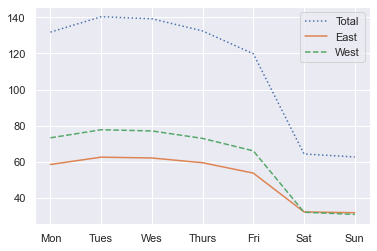

In [25]:
by_weekday = data.groupby(data.index.dayofweek).mean()

print(by_weekday)
print('')
by_weekday.index = ['Mon','Tues','Wes','Thurs','Fri','Sat','Sun']
print(by_weekday)
by_weekday.plot(style=[':','-','--'])
#el sábado y domingo practicamente no hay movimiento de bicicletas 

This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
weekend[70:75]

In [ ]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

by_time = data.groupby([weekend, data.index.time]).mean()

by_time

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).

In [ ]:
# entre semana la gente va a trabajar y en el fin de semana pedalean por ocio